# Machine Learning for Media experiences miniproject: Recognizing forest cover type

Miniproject for the Machine Learning course of the Medialogy Masters 7. Semester 2023.

The data is from the *Covertype* dataset, which contains 581012 instances, consisting of 30x30 meter cells measured by the US Forrest Service. The data includes elevation, aspect, slope, distance to hydrology, roadways and fire points, shade and soil type. The task is to classify which of 7 cover types, or type of forrest, each instance falls into.

This project is based on and draws inspiration from a similar project by Juzer Shakir: https://github.com/JuzerShakir/Forest_Cover-Type/blob/master/report.ipynb



first, all needed libraries are imported

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import sklearn
from sklearn import datasets

As the dataset im working with is part of sklearns 'datasets' library, i import it directly from there (This might take a little time as it downloads the dataset)

In [2]:
covtype = datasets.fetch_covtype(as_frame=True)

The dataset is then read into a Pandas dataframe

In [3]:
data = pd.DataFrame(data=covtype.data)
data['target'] = covtype.target

csv_file_path = 'covtype_data.csv'

data.to_csv(csv_file_path, index=False)

feature names are then set, found in the dataset information

In [4]:
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
                 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2',
                'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
                'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
                 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25',
                 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40', 'Cover_Type']

data.columns = feature_names

The first 5 instances in the dataset is printed using the .head() function

In [5]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


The ammount of observations and features is then printed, with 1 subtracted from the features as we are interested in finding the last feature *Covertype*, which is a number from 1-7 corresponding to a type of forrest

In [6]:
x, y = data.shape
print(f"Observations: {x} | Features: {y-1}")

Observations: 581012 | Features: 54


Next, the datatypes are printed to see what we're working with

In [7]:
data.dtypes

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                      float64
Wilderness_Area2                      float64
Wilderness_Area3                      float64
Wilderness_Area4                      float64
Soil_Type1                            float64
Soil_Type2                            float64
Soil_Type3                            float64
Soil_Type4                            float64
Soil_Type5                            float64
Soil_Type6                            float64
Soil_Type7                            float64
Soil_Type8                        

The .dtypes function shows all the data as floats, but according to the dataset, the wilderness and soil types are 1 hot encoded binary 1's or 0's. The dataset is then split into the 2 types, numerical and binary data. First, we look at the numerical data

In [8]:
num_fea = data.iloc[:, :10]
binary_fea = data.iloc[:, 10:-1]
num_fea.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


Next, the binary features are looked at

In [9]:
binary_fea.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


First, a look at the wilderness area features. From the binary data, it looks like the majority of observations are found in "Wilderness_Area1", so to visualize it the data is plotted

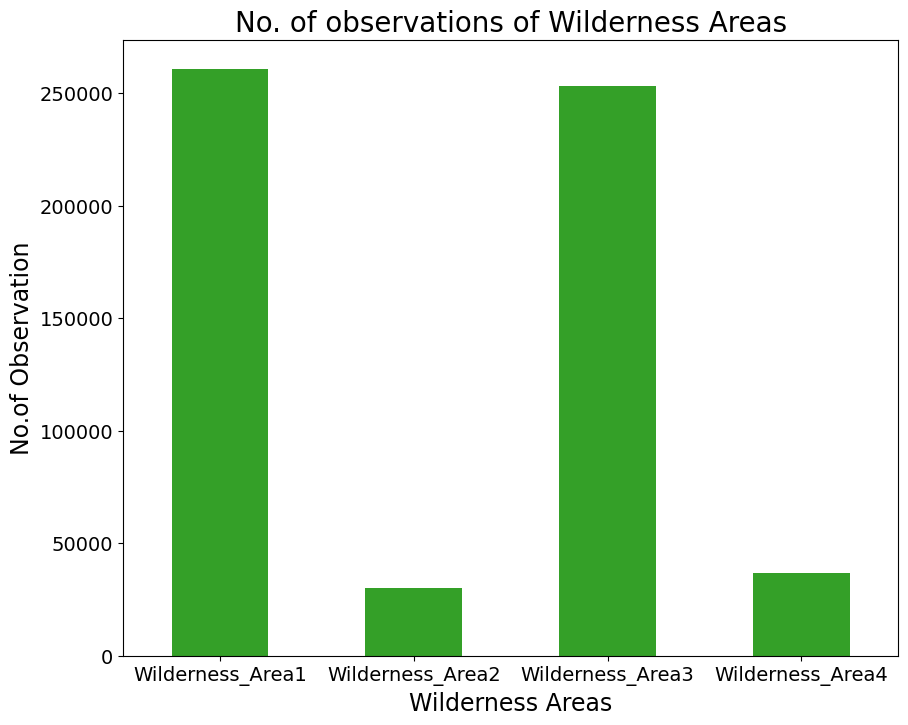

Wilderness_Area1    260796.0
Wilderness_Area2     29884.0
Wilderness_Area3    253364.0
Wilderness_Area4     36968.0
dtype: float64

In [25]:
plt = matplotlib.pyplot

Wild_data, Soil_data = binary_fea.iloc[:,:4], binary_fea.iloc[:,4:]

Wild_data.sum().plot(kind='bar', figsize=(10, 8), color='#34a028')

plt.title('No. of observations of Wilderness Areas', size = 20)

plt.xlabel('Wilderness Areas', size = 17)
plt.ylabel('No.of Observation', size = 17)

plt.xticks(rotation = 'horizontal', size = 14)
plt.yticks(size = 14)

plt.show()
Wild_data.sum()

As can be seen, most of the observations are in Area 1, followed by Area 3. Next, the soil types are looked at

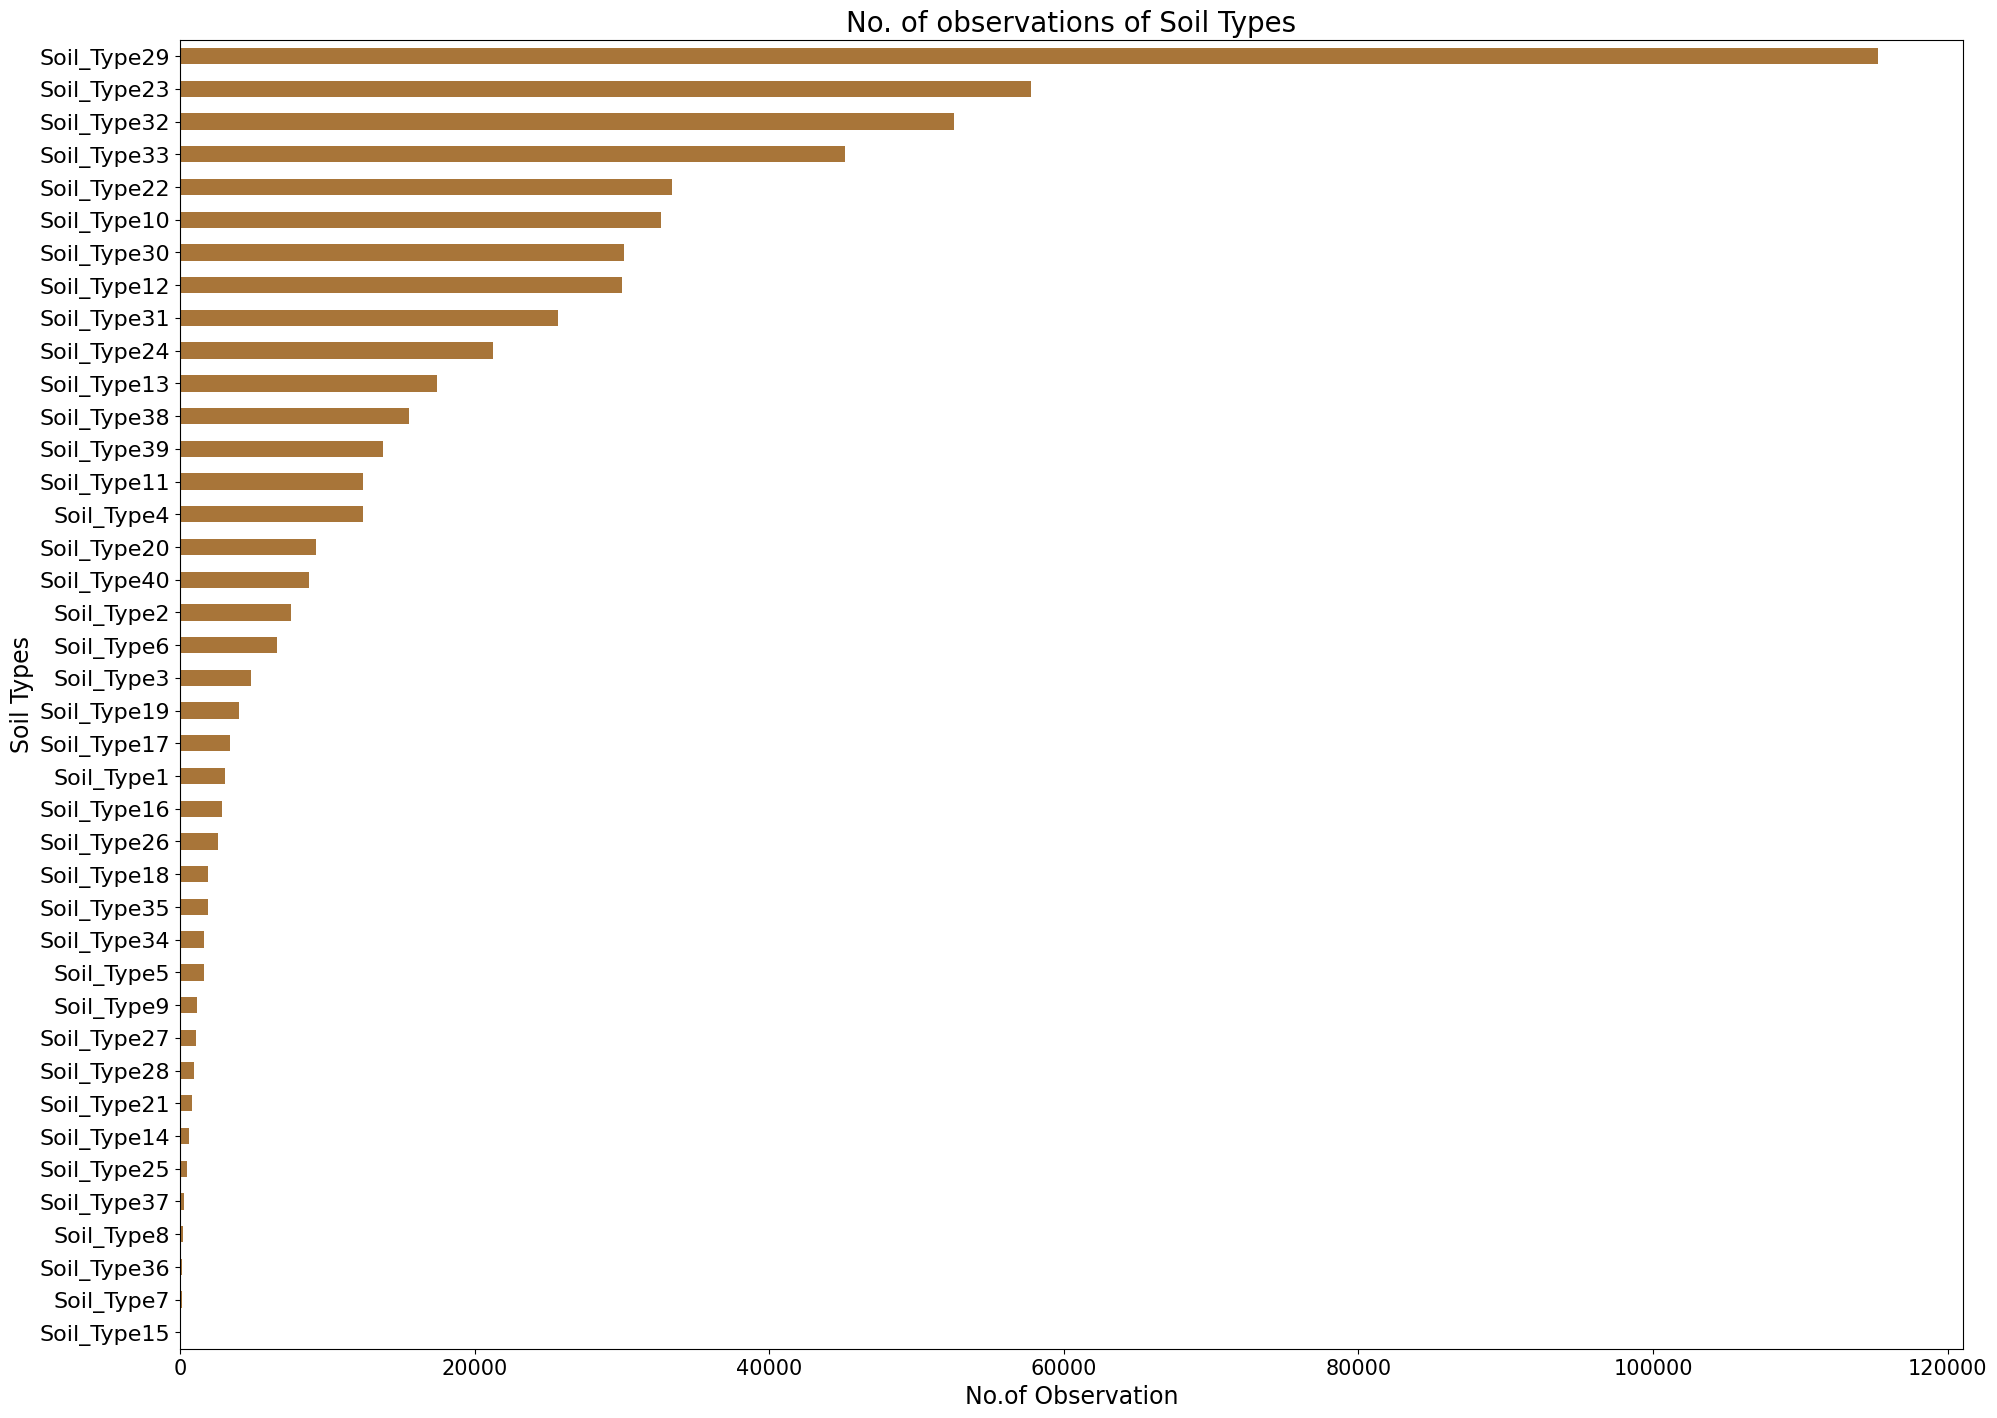

Soil_Type29    115247.0
Soil_Type23     57752.0
Soil_Type32     52519.0
Soil_Type33     45154.0
Soil_Type22     33373.0
Soil_Type10     32634.0
Soil_Type30     30170.0
Soil_Type12     29971.0
Soil_Type31     25666.0
Soil_Type24     21278.0
Soil_Type13     17431.0
Soil_Type38     15573.0
Soil_Type39     13806.0
Soil_Type11     12410.0
Soil_Type4      12396.0
Soil_Type20      9259.0
Soil_Type40      8750.0
Soil_Type2       7525.0
Soil_Type6       6575.0
Soil_Type3       4823.0
Soil_Type19      4021.0
Soil_Type17      3422.0
Soil_Type1       3031.0
Soil_Type16      2845.0
Soil_Type26      2589.0
Soil_Type18      1899.0
Soil_Type35      1891.0
Soil_Type34      1611.0
Soil_Type5       1597.0
Soil_Type9       1147.0
Soil_Type27      1086.0
Soil_Type28       946.0
Soil_Type21       838.0
Soil_Type14       599.0
Soil_Type25       474.0
Soil_Type37       298.0
Soil_Type8        179.0
Soil_Type36       119.0
Soil_Type7        105.0
Soil_Type15         3.0
dtype: float64

In [12]:
soil_sum = pd.Series(Soil_data.sum())


soil_sum.sort_values(ascending = False, inplace = True)

soil_sum.plot(kind='barh', figsize=(23, 17), color= '#a87539')

plt.gca().invert_yaxis()

plt.title('No. of observations of Soil Types', size = 20)
plt.xlabel('No.of Observation', size = 17)
plt.ylabel('Soil Types', size = 17)

plt.xticks(rotation = 'horizontal', size = 15)
plt.yticks(size = 16)

plt.show()
soil_sum

Same as the wilderness area, the soil type data spans greatly from 115 thousand observations of type 29 to only 3 observations of type 15. Therefore, the data needs to be scaled. But first, lets take a look at correlations, by looking at the numerical data

c:\Users\khs14\anaconda3\envs\MachineLearning\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


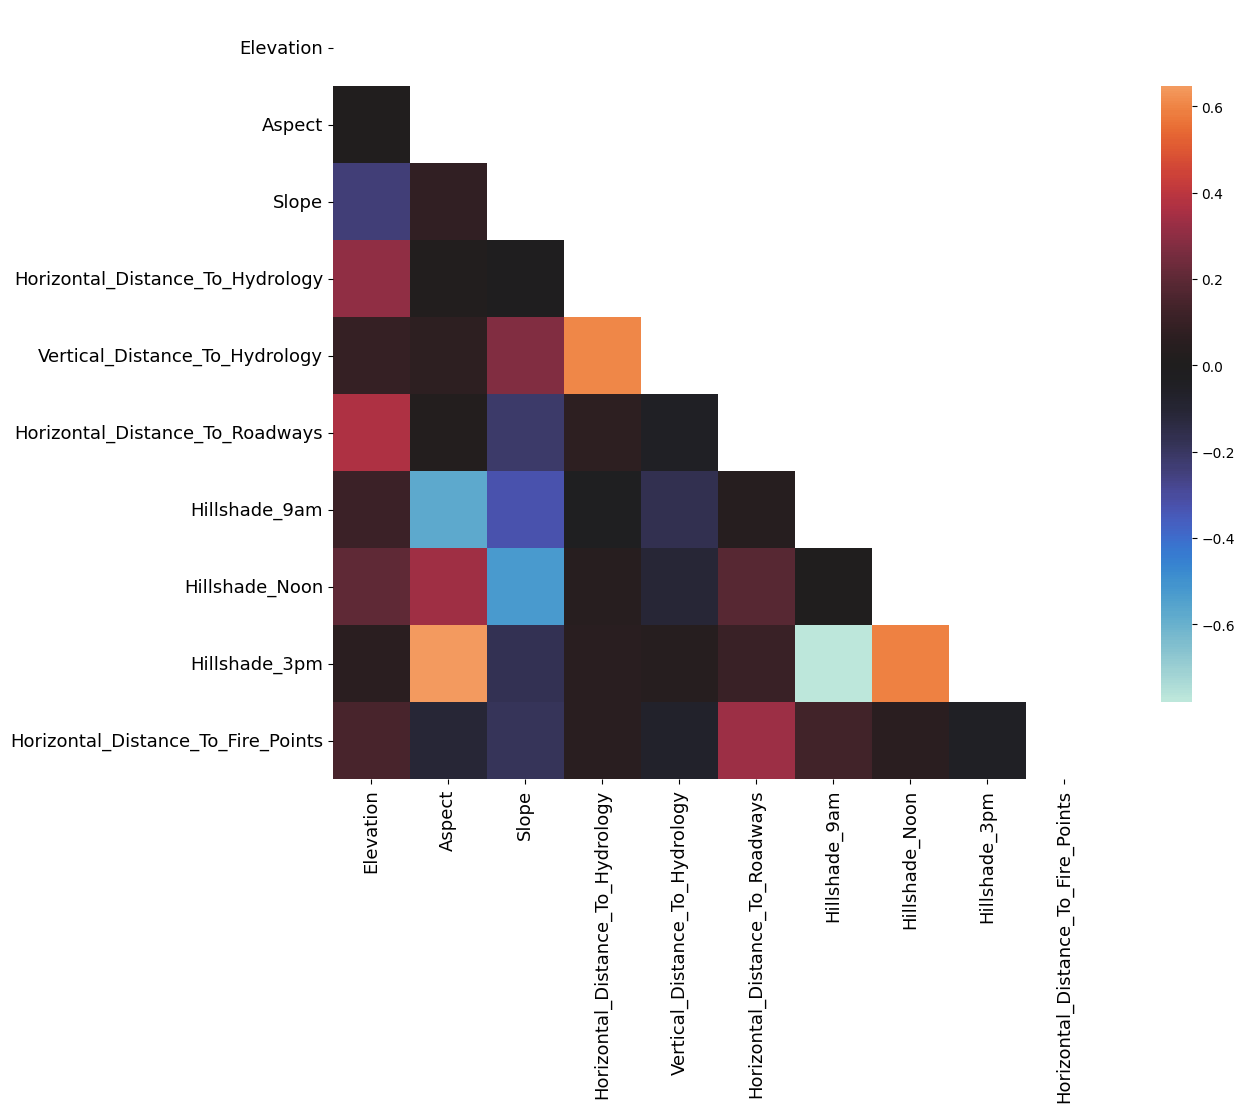

In [14]:
plt.subplots(figsize=(15, 10))

num_fea_corr = num_fea.corr()

mask = np.zeros_like(num_fea_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.show()

As can be seen, 'Hillshade_3pm' has a high negative correlation with 'hillshade_9am', which makes sense as they shouldnt really have an efect on eachother. 'Hillshade_3pm' also has a high positive correlation with Aspect, along with vertical and horizontal distance to hydrology.

Next, lets look at scaling the data

In [15]:
from sklearn.preprocessing import MinMaxScaler

sample = data[['Elevation','Horizontal_Distance_To_Roadways','Horizontal_Distance_To_Fire_Points','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Aspect','Wilderness_Area4',
            'Hillshade_Noon','Hillshade_3pm','Hillshade_9am','Slope','Soil_Type22','Soil_Type10','Soil_Type4','Soil_Type34','Soil_Type34','Wilderness_Area3','Soil_Type12',
            'Soil_Type2','Wilderness_Area1', 'Cover_Type']]

scaler = MinMaxScaler(feature_range = (0,1))

x = sample.iloc[:,:-1]
y = sample['Cover_Type']
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.36868434, 0.07165941, 0.87536596, ..., 0.        , 0.        ,
        1.        ],
       [0.36568284, 0.05479837, 0.86783772, ..., 0.        , 0.        ,
        1.        ],
       [0.47273637, 0.44681748, 0.85333891, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.26363182, 0.01264578, 0.11905758, ..., 0.        , 1.        ,
        0.        ],
       [0.26263132, 0.01264578, 0.12045169, ..., 0.        , 1.        ,
        0.        ],
       [0.26213107, 0.00941408, 0.12198522, ..., 0.        , 1.        ,
        0.        ]])

With the data being scaled, it can now be split up into a training set and a test set, with a 75/25 split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 42)

print(X_train.shape, X_test.shape)

(435759, 20) (145253, 20)


Next, a cross-validation score is set up to measure the performance of the models which are to be run on the data

In [21]:
from sklearn.model_selection import cross_val_score
import time


def model_evaluation(clf):
    clf = clf

    t_start = time.time()
    clf = clf.fit(X_train, y_train)
    t_end = time.time()

    c_start = time.time()
    accuracy  = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'accuracy')
    f1_score = cross_val_score(clf, X_train, y_train, cv = 10, scoring = 'f1_macro')
    c_end = time.time()

    acc_mean = np.round(accuracy.mean() * 100, 2)
    f1_mean = np.round(f1_score.mean() * 100, 2)

    t_time = np.round((t_end - t_start) / 60, 3)
    c_time = np.round((c_end - c_start) / 60, 3)

    clf = None

    print("The accuracy score of this classifier on our training set is", acc_mean,"% and f1 score is", f1_mean,"% taking", t_time,"minutes to train and", c_time,
          "minutes to evaluate cross validation and metric scores.")

With the cross-validation test set up, the models can be tested. Three diferent models are chosen and tested, and will be compared after running. the first selected model is a K-Nearest neighbours algorithm, which is a supervised, instance based ML model. The next model is a Stochastic Gradient Descent, which is also a supervised, but is an optimization algorithm instead of an instance based model. The last is a Random Forrest Classifier, which again is a supervised learning model, this time being an ensemble method, which means it combines multiple predicitions to improve overall performance and generalization.

In [17]:
from sklearn.neighbors import KNeighborsClassifier

model_evaluation(KNeighborsClassifier(n_jobs=-1))

The accuracy score of this classifier on our training set is 92.4 % and f1 score is 86.95 % taking 0.002 minutes to train and 34.271 minutes to evaluate cross validation and metric scores.


Next, a Stochastic gradient descent is run.

In [22]:
from sklearn.linear_model import SGDClassifier

model_evaluation(SGDClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 69.39 % and f1 score is 30.75 % taking 0.025 minutes to train and 0.502 minutes to evaluate cross validation and metric scores.


And finally, a Random Forrest Classifier.

In [19]:
from sklearn.ensemble import RandomForestClassifier

model_evaluation(RandomForestClassifier(n_jobs=-1, random_state = 53))

The accuracy score of this classifier on our training set is 94.91 % and f1 score is 91.45 % taking 2.093 minutes to train and 40.277 minutes to evaluate cross validation and metric scores.


With the three models ran, they can be compared to see which was best:

| Model | Accuracy | F1 | Training time | Evaluation time |
| --- | --- | --- | --- | --- |
| KNN | 92.4% | 86.95% | 0.002 | 34.271 |
| SGD | 69.39% | 30.75% | 0.025 | 0.502 |
| RFC | 94.91% | 91.45% | 2.093 | 40.277 |

After running the three chosen models, Random Forrest Clasifier gave the highest F1 score of 91.45%. However, it also had the longest training and evaluation time, totalling arround 42 minutes. The K Nearest Neighbours model came in 2nd, with a F1 score of 86.95%, but also a fairly long runtime of 34 minutes. The Stochastic Gradient Descent scored rather poorly, at a F1 score of only 30.75%, but was also clearly the fastest model at a total runtime of arround 1.5 minutes.